In [6]:
import numpy as np
from PIL import Image
import scipy
import cv2

ModuleNotFoundError: No module named 'cv2'

In [2]:
img = Image.open('n.jfif')

In [3]:
mat = np.array([[1,0,0],[0,1,0],[0,0,1]])

In [4]:
tra_img = scipy.ndimage.affine_transform(img, mat)

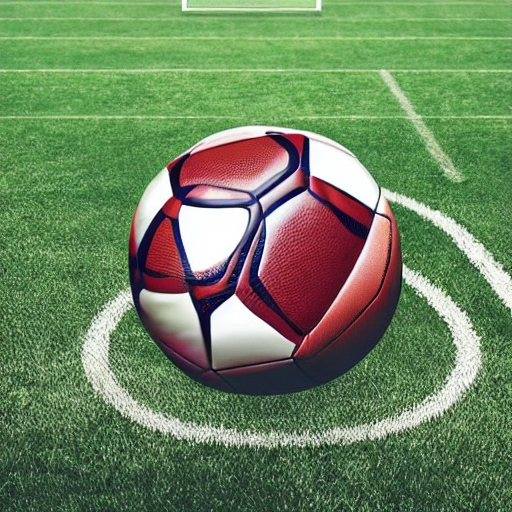

In [5]:
Image.fromarray(tra_img)

In [7]:
import sympy

In [34]:
a = sympy.Matrix([[1,1,1],[3,2,1],[2,1,2]])
a

Matrix([
[1, 1, 1],
[3, 2, 1],
[2, 1, 2]])

In [35]:
a.inv()

Matrix([
[-3/2,  1/2, 1/2],
[   2,    0,  -1],
[ 1/2, -1/2, 1/2]])

In [37]:
a.det()

-2

In [39]:
b = np.array([[0,1,4,-1],[-2,0,0,2]])
a = np.array([[],[0,3],[1,0]])
a@b

array([[ 2,  2,  8, -4],
       [-6,  0,  0,  6],
       [ 0,  1,  4, -1]])

In [ ]:
a = np.array([])